# Linear Regression: Predictive Analysis of Energy Output in Combined Cycle Power Plants

In [1]:
#load packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### (b) Exploring the data:

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 9568 rows and 5 columns in the dataset. <br>
Each row in the dataset represents one hour of data collected from a Combined Cycle Power Plant (CCPP). The columns are the features of the data including average temperature (AT), exhaust vacuum (V), atmospheric pressure (AP), and relative humidity (RH) as environmental variables, which can be used to predict the net hourly electrical energy output (EP) of the plant. 

In [3]:
df = pd.read_excel('../CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df = pd.DataFrame(df)
df

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

In [237]:
columns_name = ['Temperature', 'Exhaustz_Vacuum', 'Ambient_Pressure',
                'Relative_Humidity', 'net_hourly_electrical_energy_output']
df.columns = columns_name

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe findings.

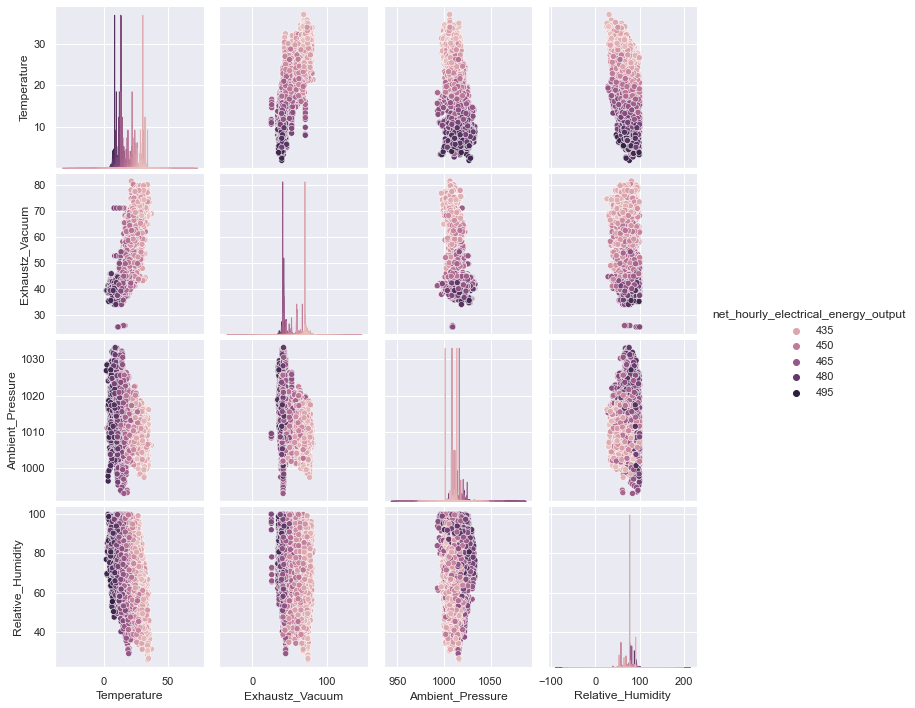

In [238]:
sns.set()
sns.pairplot(data= df,diag_kind='kde',hue = 'net_hourly_electrical_energy_output')
plt.show()

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [239]:
summary_table = pd.DataFrame()
summary_table['mean'] = df.mean()
summary_table['median'] = df.median()
summary_table['range'] = df.max() - df.min()
summary_table['first quartiles'] = df.quantile(0.25)
summary_table['third quartiles'] = df.quantile(0.75)
summary_table['interquartile range'] = df.quantile(0.75)-df.quantile(0.25)
summary_table

mean    median  range  \
Temperature                            19.651231    20.345  35.30   
Exhaustz_Vacuum                        54.305804    52.080  56.20   
Ambient_Pressure                     1013.259078  1012.940  40.41   
Relative_Humidity                      73.308978    74.975  74.60   
net_hourly_electrical_energy_output   454.365009   451.550  75.50   

                                     first quartiles  third quartiles  \
Temperature                                  13.5100            25.72   
Exhaustz_Vacuum                              41.7400            66.54   
Ambient_Pressure                           1009.1000          1017.26   
Relative_Humidity                            63.3275            84.83   
net_hourly_electrical_energy_output         439.7500           468.43   

                                     interquartile range  
Temperature                                      12.2100  
Exhaustz_Vacuum                                  24.8000  
Ambient_Pressure                                  8.1600  
Relative_Humidity                                21.5025  
net_hourly_electrical_energy_output              28.6800

### (c) For each predictor, fit a simple linear regression model to predict the response. Describe the results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up the assertions. 

The predictor variable Temperature is negatively correlated to net hourly electrical energy output. The coefficient equals to -2.1713, which means as temperature increase for 1 unit the hourly electrical energy output decrease for 2.1713 units. The R-squared value is 0.899, which means that approximately 89.9% of the variation in the net hourly electrical energy output can be explained by the linear relationship with Temperature. <br>

The predictor variable Exhaustz Vacuum is negatively correlated to net hourly electrical energy output. The coefficient equals to -1.1681, which means as temperature increase for 1 unit the hourly electrical energy output decrease for 1.1681 units. The R-squared value is 0.757, which means that approximately 75.7% of the variation in the net hourly electrical energy output can be explained by the linear relationship with Exhaustz Vacuum. <br>

The predictor variable Ambient Pressure is positively correlated to net hourly electrical energy output. The coefficient equals to 1.4899, which means as temperature increase for 1 unit the hourly electrical energy output decrease for 1.4899 units. The R-squared value is 0.269, which means that approximately 26.9% of the variation in the net hourly electrical energy output can be explained by the linear relationship with Ambient Pressure. <br>

The predictor variable Relative Humidity is positively correlated to net hourly electrical energy output. The coefficient equals to 0.4557 , which means as temperature increase for 1 unit the hourly electrical energy output decrease for 0.4557 units. The R-squared value is 0.152, which means that approximately 15.2% of the variation in the net hourly electrical energy output can be explained by the linear relationship with Relative Humidity. <br>

Since all the models have p-values close to zero for the predictor(s), it indicates that there is a statistically significant association between the predictor(s) and the response variable in all of these models. 

Outliers: point out in graph, be specific, threshold, practice to remove

Predictor Variable: Temperature
                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.899
Model:                                             OLS   Adj. R-squared:                  0.899
Method:                                  Least Squares   F-statistic:                 8.510e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:46:59   Log-Likelihood:                -29756.
No. Observations:                                 9568   AIC:                         5.952e+04
Df Residuals:                                     9566   BIC:                         5.953e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
        

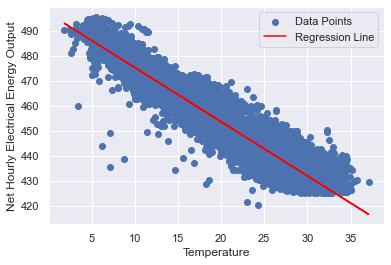

Predictor Variable: Exhaustz_Vacuum
                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.757
Model:                                             OLS   Adj. R-squared:                  0.756
Method:                                  Least Squares   F-statistic:                 2.972e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:46:59   Log-Likelihood:                -33963.
No. Observations:                                 9568   AIC:                         6.793e+04
Df Residuals:                                     9566   BIC:                         6.794e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
    

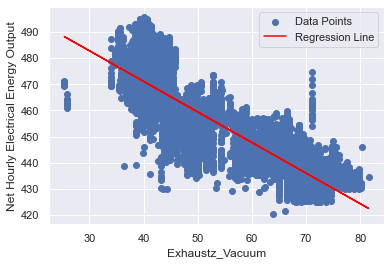

Predictor Variable: Ambient_Pressure
                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.269
Model:                                             OLS   Adj. R-squared:                  0.269
Method:                                  Least Squares   F-statistic:                     3516.
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:46:59   Log-Likelihood:                -39224.
No. Observations:                                 9568   AIC:                         7.845e+04
Df Residuals:                                     9566   BIC:                         7.847e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
   

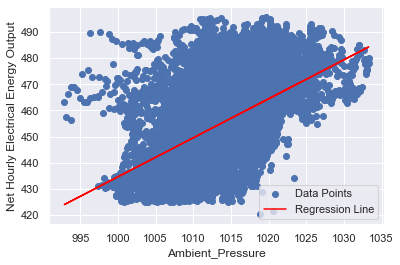

Predictor Variable: Relative_Humidity
                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.152
Model:                                             OLS   Adj. R-squared:                  0.152
Method:                                  Least Squares   F-statistic:                     1714.
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -39933.
No. Observations:                                 9568   AIC:                         7.987e+04
Df Residuals:                                     9566   BIC:                         7.988e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
  

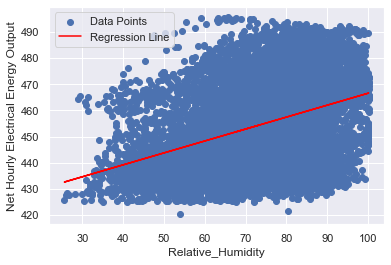

In [240]:
independent_variables = ['Temperature', 'Exhaustz_Vacuum', 'Ambient_Pressure','Relative_Humidity']

# Loop through each independent variables
for predictor in independent_variables:
    # Prepare the predictor variable (X) and the response variable (y)
    X = df[predictor]
    y = df['net_hourly_electrical_energy_output']
    # Add a constant term (intercept)
    X = sm.add_constant(X)

    # Fit the multiple regression model
    model = sm.OLS(y, X).fit()

    # Print model information
    print(f"Predictor Variable: {predictor}")
    print(model.summary())

    # Create scatterplot and regression line
    plt.scatter(df[predictor], df['net_hourly_electrical_energy_output'], label='Data Points')
    plt.plot(df[predictor], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel('Net Hourly Electrical Energy Output')
    plt.legend()
    plt.show()


###  (d) Fit a multiple regression model to predict the response using all of the predictors.Describe the results. For which predictors can we reject the null hypothesis H0:βj= 0?

The R-squared of the multiple regression model is 0.929, which indicates that approximately 92.9% of the variation in the dependent variable is explained by the independent variables in the model. <br>

The coefficient for 'Temperature' is -1.9775, and its associated p-value is very close to zero (<< 0.05). This indicates that there is a statistically significant negative relationship between 'Temperature' and the dependent variable. <br>

The coefficient for 'Exhaustz Vacuum' is -0.2339, and its associated p-value is very close to zero (<< 0.05). This indicates that there is a statistically significant negative relationship between 'Exhaustz Vacuum' and the dependent variable. <br>

The coefficient for 'Ambient Pressure' is 0.0621, and its associated p-value is very close to zero (<< 0.05). This indicates that there is a statistically significant positive relationship between 'Ambient Pressure' and the dependent variable. <br>

The coefficient for 'Relative Humidity' is -0.1581 , and its associated p-value is very close to zero (<< 0.05). This indicates that there is a statistically significant negative relationship between 'Relative Humidity' and the dependent variable. <br>

Given that all p-values are less than 0.05, we can assert that, for all the predictors, we have sufficient evidence to reject the null hypothesis H0: βj = 0.

In [241]:
import statsmodels.api as sm

# Prepare the predictor variables (X) and the response variable (y)
X = df[['Temperature', 'Exhaustz_Vacuum', 'Ambient_Pressure', 'Relative_Humidity']]
y = df['net_hourly_electrical_energy_output']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.929
Model:                                             OLS   Adj. R-squared:                  0.929
Method:                                  Least Squares   F-statistic:                 3.114e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -28088.
No. Observations:                                 9568   AIC:                         5.619e+04
Df Residuals:                                     9563   BIC:                         5.622e+04
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
                        coef    std err 

### e) Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

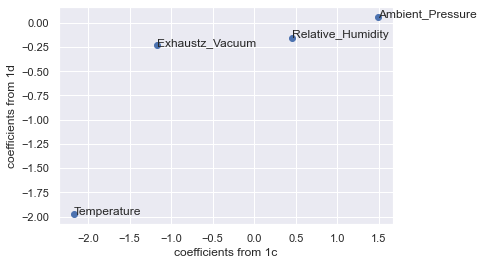

In [242]:
c_coef = [-2.1713, -1.1681, 1.4899, 0.4557]
d_coef = [-1.9775, -0.2339, 0.0621, -0.1581]
Independent_variables = ['Temperature', 'Exhaustz_Vacuum', 'Ambient_Pressure', 'Relative_Humidity']
coefficients_df = pd.DataFrame({
    'Independent Variable': Independent_variables,
    'Coefficient (c_coef)': c_coef,
    'Coefficient (d_coef)': d_coef
})


plt.scatter(x=coefficients_df['Coefficient (c_coef)'],y=coefficients_df['Coefficient (d_coef)'])
plt.xlabel('coefficients from 1c')
plt.ylabel('coefficients from 1d')

for i, row in coefficients_df.iterrows():
    plt.annotate(row['Independent Variable'], (row['Coefficient (c_coef)'], row['Coefficient (d_coef)']))


plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
### Y = β0+β1X+β2X2+β3X3+e

In [243]:
X_f_T = df['Temperature']
X_poly = pd.DataFrame({'Temperature': X_f_T, 'Temperature^2': X_f_T ** 2, 'Temperature^3': X_f_T ** 3})

# Add a constant term
X_poly = sm.add_constant(X_poly)

# Fit the polynomial regression model
y_f = df['net_hourly_electrical_energy_output']
model_f_T = sm.OLS(y, X_poly).fit()

# Print the summary
print(model_f_T.summary())

                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.912
Model:                                             OLS   Adj. R-squared:                  0.912
Method:                                  Least Squares   F-statistic:                 3.299e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -29101.
No. Observations:                                 9568   AIC:                         5.821e+04
Df Residuals:                                     9564   BIC:                         5.824e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                    coef    std err     

In [244]:
X_f_ev = df['Exhaustz_Vacuum']
X_poly_ev = pd.DataFrame({'Exhaustz_Vacuum': X_f_ev, 'Exhaustz_Vacuum^2': X_f_ev ** 2, 'Exhaustz_Vacuum^3': X_f_ev ** 3})

# Add a constant term
X_poly_ev = sm.add_constant(X_poly_ev)

# Fit the polynomial regression model
model_f_ev = sm.OLS(y_f, X_poly_ev).fit()

# Print the summary
print(model_f_ev.summary())

                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.775
Model:                                             OLS   Adj. R-squared:                  0.775
Method:                                  Least Squares   F-statistic:                 1.098e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -33585.
No. Observations:                                 9568   AIC:                         6.718e+04
Df Residuals:                                     9564   BIC:                         6.721e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                        coef    std err 

In [245]:
X_f_ap = df['Ambient_Pressure']
X_poly_ap = pd.DataFrame({'Ambient_Pressure': X_f_ap, 'Ambient_Pressure^2': X_f_ap ** 2, 'Ambient_Pressure^3': X_f_ap ** 3})

# Add a constant term
X_poly_ap = sm.add_constant(X_poly_ap)

# Fit the polynomial regression model
model_f_ap = sm.OLS(y_f, X_poly_ap).fit()

# Print the summary
print(model_f_ap.summary())

                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.275
Model:                                             OLS   Adj. R-squared:                  0.275
Method:                                  Least Squares   F-statistic:                     1813.
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -39184.
No. Observations:                                 9568   AIC:                         7.837e+04
Df Residuals:                                     9565   BIC:                         7.840e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                         coef    std err

In [246]:
X_f_rh = df['Relative_Humidity']
X_poly_rh = pd.DataFrame({'Relative_Humidity':X_f_rh, 'Relative_Humidity^2':X_f_rh** 2, 'Relative_Humidity^3':X_f_rh** 3})

# Add a constant term
X_poly_rh = sm.add_constant(X_poly_rh)

# Fit the polynomial regression model
model_f_rh = sm.OLS(y_f, X_poly_rh).fit()

# Print the summary
print(model_f_rh.summary())

                                     OLS Regression Results                                    
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.154
Model:                                             OLS   Adj. R-squared:                  0.153
Method:                                  Least Squares   F-statistic:                     579.2
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:00   Log-Likelihood:                -39923.
No. Observations:                                 9568   AIC:                         7.985e+04
Df Residuals:                                     9564   BIC:                         7.988e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                          coef    std er

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

Since we have 4 features in this case, we need to run 6 linear regression model to explore the relationship between predictors. Here is the summary of the linear regression model: <bn>

There is a positive relationship between 'Temperature' and 'exhaustz vaccum', and the coefficient is 0.495. The R-squared is 0.713, whcih means approximately 71.3% of the variation in the Temperature can be explained by the linear relationship with Exhaustz Vacuum. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn>

There is a negative relationship between 'Temperature' and 'Ambient Pressure', and the coefficient is -0.6369 . The R-squared is 0.258, whcih means approximately 25.8% of the variation in the Temperature can be explained by the linear relationship with Ambient Pressure. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn>

There is a negative relationship between 'Temperature' and 'Relative Humidity', and the coefficient is -0.2769 . The R-squared is 0.294, whcih means approximately 29.4% of the variation in the Temperature can be explained by the linear relationship with Relative Humidity. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn>
    
There is a negative relationship between 'Ambient Pressure' and 'Exhaustz Vacuum', and the coefficient is -0.8848. The R-squared is 0.171, whcih means approximately 17.1% of the variation in the Exhaustz Vacuum can be explained by the linear relationship with Ambient Pressure. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn>
    
There is a negative relationship between 'Relative Humidity' and 'Exhaustz Vacuum', and the coefficient is -0.2717. The R-squared is 0.097, whcih means that only 9.7% of the variation in the Exhaustz Vacuum can be explained by the linear relationship with Relative Humidity. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn> 
    
There is a positive relationship between 'Relative Humidity' and 'Ambient Pressure', and the coefficient is 0.2448. The R-squared is 0.01, whcih means that only 1% of the variation in the Ambient Pressure can be explained by the linear relationship with Relative Humidity. P value is smaller than 0.05, which indicates that the interaction term is staitstically significant. <bn> 


Predictor Variable: Exhaustz_Vacuum
                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:47:00   Log-Likelihood:                -26830.
No. Observations:                9568   AIC:                         5.366e+04
Df Residuals:                    9566   BIC:                         5.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const 

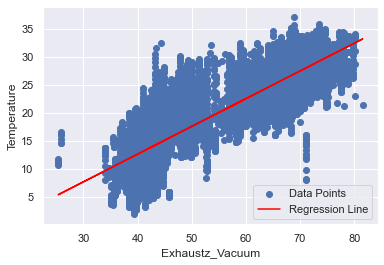

Predictor Variable: Ambient_Pressure
                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     3319.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:47:00   Log-Likelihood:                -31369.
No. Observations:                9568   AIC:                         6.274e+04
Df Residuals:                    9566   BIC:                         6.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

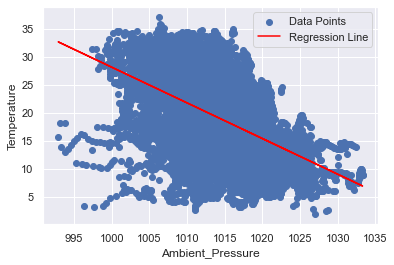

Predictor Variable: Relative_Humidity
                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     3990.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:47:01   Log-Likelihood:                -31126.
No. Observations:                9568   AIC:                         6.226e+04
Df Residuals:                    9566   BIC:                         6.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


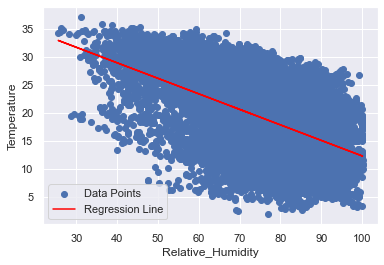

In [247]:
# Relationship between temperature
predictor_droptemp = ['Exhaustz_Vacuum', 'Ambient_Pressure', 'Relative_Humidity']
for predictor in predictor_droptemp:
    # Prepare the predictor variable (X) and the response variable (y)
    X = df[predictor]
    y = df['Temperature']
    # Add a constant term (intercept)
    X = sm.add_constant(X)

    # Fit the multiple regression model
    model = sm.OLS(y, X).fit()

    # Print model information
    print(f"Predictor Variable: {predictor}")
    print(model.summary())

    # Create scatterplot and regression line
    plt.scatter(df[predictor], y, label='Data Points')
    plt.plot(df[predictor], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()

Predictor Variable: Ambient_Pressure
                            OLS Regression Results                            
Dep. Variable:        Exhaustz_Vacuum   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1973.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:47:01   Log-Likelihood:                -37003.
No. Observations:                9568   AIC:                         7.401e+04
Df Residuals:                    9566   BIC:                         7.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

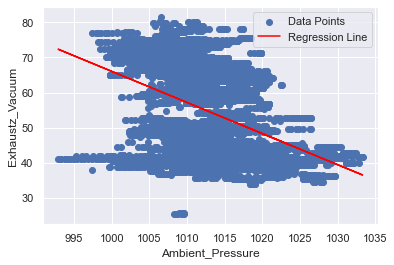

Predictor Variable: Relative_Humidity
                            OLS Regression Results                            
Dep. Variable:        Exhaustz_Vacuum   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1033.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          2.57e-215
Time:                        17:47:01   Log-Likelihood:                -37409.
No. Observations:                9568   AIC:                         7.482e+04
Df Residuals:                    9566   BIC:                         7.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


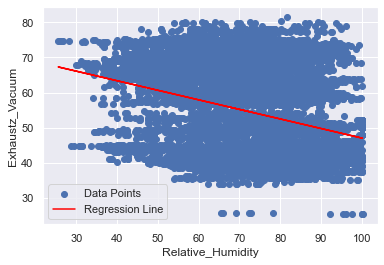

In [248]:
predictor_drop_ev_temp = ['Ambient_Pressure', 'Relative_Humidity']

for predictor in predictor_drop_ev_temp:
    # Prepare the predictor variable (X) and the response variable (y)
    X = df[predictor]
    y = df['Exhaustz_Vacuum']
    
    # Add a constant term (intercept) to the predictor variable
    X = sm.add_constant(X)
    
    # Fit the simple linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print model information
    print(f"Predictor Variable: {predictor}")
    print(model.summary())
    
    # Create scatterplot
    plt.scatter(df[predictor], y, label='Data Points')  # Use 'y' as the response variable
    plt.plot(df[predictor], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel('Exhaustz_Vacuum')  # Use 'Temperature' as the response variable
    plt.legend()
    plt.show()


Predictor Variable: Ambient_Pressure
                            OLS Regression Results                            
Dep. Variable:      Relative_Humidity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.80
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.62e-22
Time:                        17:47:01   Log-Likelihood:                -39180.
No. Observations:                9568   AIC:                         7.836e+04
Df Residuals:                    9566   BIC:                         7.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

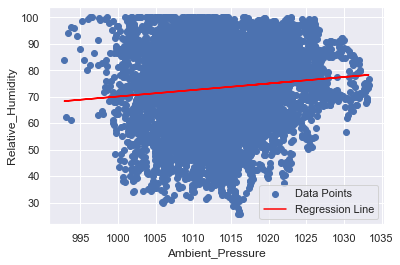

In [249]:
# Prepare the predictor variable (X) and the response variable (y)
X_AP = df['Ambient_Pressure']
y_RH = df['Relative_Humidity']

# Add a constant term (intercept) to the predictor variable
X_AP = sm.add_constant(X_AP)

# Fit the simple linear regression model
model = sm.OLS(y_RH, X_AP).fit()

# Print model information
print(f"Predictor Variable: Ambient_Pressure")
print(model.summary())

# Create scatterplot
plt.scatter(df['Ambient_Pressure'], y_RH, label='Data Points')
plt.plot(df['Ambient_Pressure'], model.predict(X_AP), color='red', label='Regression Line')
plt.xlabel('Ambient_Pressure')
plt.ylabel('Relative_Humidity')
plt.legend()
plt.show()


### (h) Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report the train and test MSEs.

In [250]:
#split the data into train and test set
X = df[independent_variables]
y = df['net_hourly_electrical_energy_output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model on the training data
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Predict on training and test data
y_train_pred1 = model_original.predict(X_train)
y_test_pred1 = model_original.predict(X_test)

# Calculate Mean Squared Error (MSE) for both training and test data
mse_train_original = mean_squared_error(y_train, y_train_pred1)
mse_test_original = mean_squared_error(y_test, y_test_pred1)

print(f"Model 1 - Linear Regression with All Predictors:")
print(f"Train MSE: {mse_train_original}")
print(f"Test MSE: {mse_test_original}")

Model 1 - Linear Regression with All Predictors:
Train MSE: 20.580839725738695
Test MSE: 21.239856938225493


In [251]:
import statsmodels.api as sm

# Create interaction terms and quadratic nonlinearities for all predictors
X_train_interact = X_train.copy()
X_test_interact = X_test.copy()

for col in X_train.columns:
    X_train_interact[f'{col}_squared'] = X_train[col] ** 2
    for col2 in X_train.columns:
        if col != col2:
            X_train_interact[f'{col}_{col2}_interaction'] = X_train[col] * X_train[col2]

for col in X_test.columns:
    X_test_interact[f'{col}_squared'] = X_test[col] ** 2
    for col2 in X_test.columns:
        if col != col2:
            X_test_interact[f'{col}_{col2}_interaction'] = X_test[col] * X_test[col2]

# Add a constant for the intercept
X_train_interact = sm.add_constant(X_train_interact)
X_test_interact = sm.add_constant(X_test_interact)

# Fit a linear regression model with interaction terms and quadratic nonlinearities
model2 = sm.OLS(y_train, X_train_interact).fit()

# Remove insignificant variables based on p-values
significant_vars = model2.pvalues[model2.pvalues < 0.05].index
X_train_final = X_train_interact[significant_vars]
X_test_final = X_test_interact[significant_vars]

# Fit the final model
model2_final = sm.OLS(y_train, X_train_final).fit()

# Predict on training and test data
y_train_pred2 = model2_final.predict(X_train_final)
y_test_pred2 = model2_final.predict(X_test_final)

# Calculate Mean Squared Error (MSE) for both training and test data
mse_train2 = mean_squared_error(y_train, y_train_pred2)
mse_test2 = mean_squared_error(y_test, y_test_pred2)

print("\nModel 2 - Linear Regression with Interaction Terms and Quadratic Nonlinearities:")
print(f"Train MSE: {mse_train2:.2f}")
print(f"Test MSE: {mse_test2:.2f}")


model2_final.summary()


Model 2 - Linear Regression with Interaction Terms and Quadratic Nonlinearities:
Train MSE: 18.46
Test MSE: 19.22


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     net_hourly_electrical_energy_output   R-squared:                       0.936
Model:                                             OLS   Adj. R-squared:                  0.936
Method:                                  Least Squares   F-statistic:                 1.095e+04
Date:                                 Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                         17:47:01   Log-Likelihood:                -19265.
No. Observations:                                 6697   AIC:                         3.855e+04
Df Residuals:                                     6687   BIC:                         3.862e+04
Df Model:                                            9                                         
Covariance Type:                             nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                          -9657.0380   1106.254     -8.729      0.000   -1.18e+04   -7488.427
Temperature                                       -2.3983      0.102    -23.568      0.000      -2.598      -2.199
Ambient_Pressure                                  19.5314      2.187      8.932      0.000      15.245      23.818
Relative_Humidity                                  5.9680      0.766      7.787      0.000       4.465       7.470
Temperature_squared                                0.0397      0.002     24.286      0.000       0.037       0.043
Temperature_Exhaustz_Vacuum_interaction           -0.0059      0.000    -30.009      0.000      -0.006      -0.006
Temperature_Relative_Humidity_interaction         -0.0029      0.000     -6.724      0.000      -0.004      -0.002
Exhaustz_Vacuum_Temperature_interaction           -0.0059      0.000    -30.009      0.000      -0.006      -0.006
Ambient_Pressure_squared                          -0.0094      0.001     -8.683      0.000      -0.012      -0.007
Ambient_Pressure_Relative_Humidity_interaction    -0.0028      0.000     -7.548      0.000      -0.004      -0.002
Relative_Humidity_squared                         -0.0022      0.000     -7.789      0.000      -0.003      -0.002
Relative_Humidity_Temperature_interaction         -0.0029      0.000     -6.724      0.000      -0.004      -0.002
Relative_Humidity_Ambient_Pressure_interaction    -0.0028      0.000     -7.548      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     1113.183   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7159.713
Skew:                          -0.637   Prob(JB):                         0.00
Kurtosis:                       7.903   Cond. No.                     1.22e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### (i) KNN Regression:

#### i.Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k∈ {1,2, . . . ,100} that gives the best fit. Plot the train and test errors in terms of 1/k.

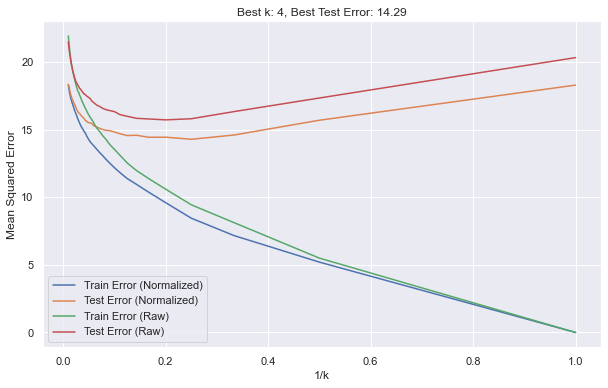

Best k: 4
Test error of best K: 14.29


In [255]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store train and test errors
train_errors_normalized = []
test_errors_normalized = []
train_errors_raw = []
test_errors_raw = []

# Create a range of k values from 1 to 100
k_values = range(1, 101)

# Initialize a variable to track the best k and the corresponding test error
best_k = None
best_test_error = float('inf')  # Initialize with a high value

for k in k_values:
    # Create and fit K-NN regression models for normalized and raw features
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    
    # Normalize features if using normalized features
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    knn_normalized.fit(X_train_normalized, y_train)
    knn_raw.fit(X_train, y_train)
    
    # Predict for training and test data
    y_train_pred_normalized = knn_normalized.predict(X_train_normalized)
    y_test_pred_normalized = knn_normalized.predict(X_test_normalized)
    
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    
    # Calculate Mean Squared Errors (MSE) for both sets of predictions
    train_error_normalized = mean_squared_error(y_train, y_train_pred_normalized)
    test_error_normalized = mean_squared_error(y_test, y_test_pred_normalized)
    
    train_error_raw = mean_squared_error(y_train, y_train_pred_raw)
    test_error_raw = mean_squared_error(y_test, y_test_pred_raw)
    
    # Append errors to lists
    train_errors_normalized.append(train_error_normalized)
    test_errors_normalized.append(test_error_normalized)
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)
    
    # Track the best k based on test error
    if test_error_normalized < best_test_error:
        best_test_error = test_error_normalized
        best_k = k

# Plot the train and test errors in terms of 1/k
plt.figure(figsize=(10, 6))
plt.plot(1 / np.array(k_values), train_errors_normalized, label='Train Error (Normalized)')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Test Error (Normalized)')
plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw)')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title(f'Best k: {best_k}, Best Test Error: {best_test_error:.2f}')
plt.show()

# Print the best k and its corresponding test error
print(f"Best k: {best_k}")
print(f"Test error of best K: {best_test_error:.2f}")

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide the analysis.

The K-NN Regression model using K=4 exhibits a Mean Squared Error (MSE) of 14.291333. In contrast, the Linear Regression model, which includes interaction terms and quadratic nonlinearities, shows a training MSE of 18.46. The K-NN Regression model appears to perform better in terms of training MSE compared to the linear regression model with interaction terms and quadratic nonlinearities. A lower MSE indicates that the K-NN model fits the training data more closely and potentially captures the underlying patterns well.

### 2. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify the answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.

In this case, a flexible method would perform better than an inflexible method, because with a large size of data, we can approach the tru distribution.

#### (b) The number of predictors p is extremely large, and the number of observations n is small.

An inflexible method would be more suitable for this senario. Because inflexible method would prefent overfitting and provide regularization. 

#### (c) The relationship between the predictors and response is highly non-linear.

Flexible methods would work better, as they are able to capture the non-linear patterns.

#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

Inflexible methods are more suitable for this senario, as they are more robust to deal with noisy data and avoid overfitting to noise.

### 3. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

Obs. X1 X2 X3 Y <br>
   1 0  3  0  Red <br>
   2 2  0  0  Red <br>
   3 0  1  3  Red <br>
   4 0  1  2  Green <br>
   5 −1 0  1  Green <br>
   6 1  1  1  Red <br>
### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point, X1 =X2 =X3 =0.

In [223]:
observations = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
test_point = np.array([0, 0, 0])

# Compute Euclidean distances
distances = np.sqrt(np.sum((observations - test_point)**2, axis=1))

# Print the distances
for i, distance in enumerate(distances):
    print(f"Observation {i + 1}: Distance = {distance:.2f}")

Observation 1: Distance = 3.00
Observation 2: Distance = 2.00
Observation 3: Distance = 3.16
Observation 4: Distance = 2.24
Observation 5: Distance = 1.41
Observation 6: Distance = 1.73


#### (b) What is our prediction with K = 1? Why?

With K = 1, we consider the closest observation, which is Observation 5 (Green). So, our prediction is Green because the nearest neighbor is Observation 5.

#### (c) What is our prediction with K = 3? Why?

With K = 3, we consider the three closest observations: Observations 5 (Green), 4 (Green), and 6 (Red). Among these, Green has a majority. So, our prediction is Green.

#### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We would expect the best value for K to be small. Decreasing K means that predictions are predominantly shaped by a smaller subset of nearest neighbors, resulting in heightened sensitivity to localized patterns. This increased sensitivity to local patterns enhances the model's capacity to capture intricate non-linear decision boundaries effectively. Conversely, increasing K results in a more smoothed decision boundary, reducing its adaptability, which may not be well-suited for highly non-linear scenarios.